## Εργαστηριακή Άσκηση Ψηφιακών Επικοινωνιών: Εξερεύνηση Τεχνικών Διαμόρφωσης μέσω Προσομοίωσης

In [17]:
%load_ext autoreload
%autoreload 2
from modulation_lib import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample_poly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Comparative Results PCM - DPCM - ADPCM

In [18]:
fs = 8000  # Sampling frequency
duration = 0.1  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Frequency in Hz
signal = np.sin(2 * np.pi * frequency * t)
num_bits = 16


# PCM Simulation
encoded_pcm, quantized_pcm, error_pcm, q_levels = pcm_encode(signal, num_bits)
reconstructed_pcm = pcm_decode(encoded_pcm, q_levels)
SNR_PCM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_pcm ** 2))

# DPCM Simulation
step_size_dpcm = 0.1
encoded_dpcm, predictor_dpcm = dpcm_encode(signal, step_size=step_size_dpcm, bit_depth=num_bits)
reconstructed_dpcm = dpcm_decode(encoded_dpcm, step_size=step_size_dpcm, bit_depth=num_bits)
error_dpcm = signal - reconstructed_dpcm
SNR_DPCM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_dpcm ** 2))

# ADPCM Simulation
initial_step_size_adpcm = 0.1
encoded_adpcm,step_size_adpcm = adpcm_encode(signal, initial_step_size=initial_step_size_adpcm, bit_depth=num_bits)
reconstructed_adpcm = adpcm_decode(encoded_adpcm, initial_step_size=initial_step_size_adpcm, bit_depth=num_bits)
error_adpcm = signal - reconstructed_adpcm
SNR_ADPCM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_adpcm ** 2))




In [19]:
print(f"PCM SNR: {SNR_PCM:.2f} dB")
print(f"DPCM SNR: {SNR_DPCM:.2f} dB")
print(f"ADPCM SNR: {SNR_ADPCM:.2f} dB")


PCM SNR: 96.02 dB
DPCM SNR: 42.97 dB
ADPCM SNR: 41.43 dB


#### Comparative Results DM - ADM - ΣΔ

In [20]:
# Signal generation
fs = 8000  # Sampling frequency
duration = 0.01  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Signal frequency in Hz
signal = np.sin(2 * np.pi * frequency * t)


DM SNR: 0.99 dB


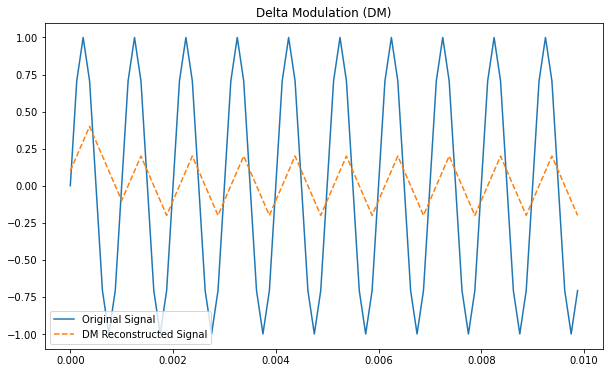

In [21]:

delta_dm = 0.1  # Step size for DM
# Encode
encoded_dm, predictor_dm = delta_modulation_encode(signal, delta=delta_dm)
# Decode
reconstructed_dm = delta_modulation_decode(encoded_dm, delta=delta_dm)
error_dm = signal - reconstructed_dm
SNR_DM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_dm ** 2))
print(f"DM SNR: {SNR_DM:.2f} dB")
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_dm, label='DM Reconstructed Signal', linestyle='--')
plt.title('Delta Modulation (DM)')
plt.legend()
plt.show()


In [22]:
'''
# ADM
delta_min_adm = 0.1
delta_max_adm = 1.0
alpha_adm = 1.5

# Encode
encoded_bits, predictor_values, encoder_step_sizes = adaptive_delta_modulation_encode(
    signal, delta_min, delta_max, alpha
)

# Decode the signal
reconstructed_signal, decoder_step_sizes = adaptive_delta_modulation_decode(
    encoded_bits, delta_min, delta_max, alpha
)
error_adm = signal - reconstructed_adm
SNR_ADM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_adm ** 2))

print(f"ADM SNR: {SNR_ADM:.2f} dB")
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_adm, label='ADM Reconstructed Signal', linestyle='--')
plt.title('Adaptive Delta Modulation (ADM)')
plt.legend()
plt.show()

# Plotting Step Sizes
plt.figure(figsize=(10, 4))
plt.plot(step_sizes_adm)
plt.title('ADM Step Size Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Step Size')
plt.show()
'''

'\n# ADM\ndelta_min_adm = 0.1\ndelta_max_adm = 1.0\nalpha_adm = 1.5\n\n# Encode\nencoded_bits, predictor_values, encoder_step_sizes = adaptive_delta_modulation_encode(\n    signal, delta_min, delta_max, alpha\n)\n\n# Decode the signal\nreconstructed_signal, decoder_step_sizes = adaptive_delta_modulation_decode(\n    encoded_bits, delta_min, delta_max, alpha\n)\nerror_adm = signal - reconstructed_adm\nSNR_ADM = 10 * np.log10(np.mean(signal ** 2) / np.mean(error_adm ** 2))\n\nprint(f"ADM SNR: {SNR_ADM:.2f} dB")\nplt.figure(figsize=(10, 6))\nplt.plot(t, signal, label=\'Original Signal\')\nplt.plot(t, reconstructed_adm, label=\'ADM Reconstructed Signal\', linestyle=\'--\')\nplt.title(\'Adaptive Delta Modulation (ADM)\')\nplt.legend()\nplt.show()\n\n# Plotting Step Sizes\nplt.figure(figsize=(10, 4))\nplt.plot(step_sizes_adm)\nplt.title(\'ADM Step Size Over Time\')\nplt.xlabel(\'Sample Index\')\nplt.ylabel(\'Step Size\')\nplt.show()\n'

### PCM Encoding

PCM Encoding:
Total bits used: 3200
SQNR: 25.36 dB


/tmp/ipykernel_116314/2302825792.py:57: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(t, 10 * np.log10(signal[:len(quantization_error)] ** 2 / quantization_error ** 2))
/tmp/ipykernel_116314/2302825792.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, 10 * np.log10(signal[:len(quantization_error)] ** 2 / quantization_error ** 2))


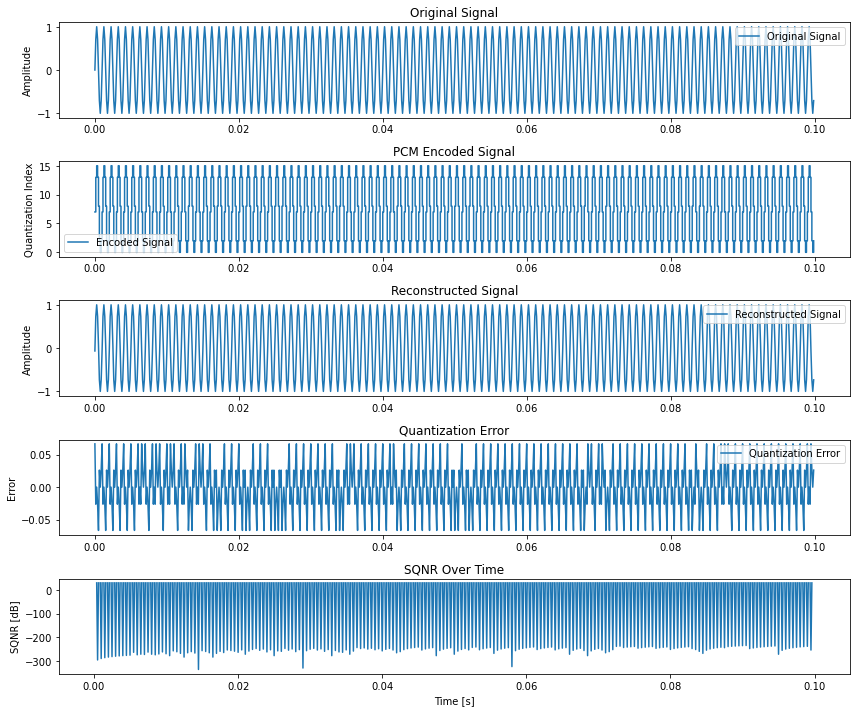

In [23]:
# Generate a sample input signal (e.g., a sine wave)
fs = 8000  # Sampling frequency
duration = 0.01  # in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Signal frequency in Hz
amplitude = 1
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Number of bits per sample for quantization
num_bits = 4  # Adjust the number of bits (e.g., 4 bits for 16 levels)

# Encode the signal using PCM
encoded_signal, quantized_signal, quantization_error, q_levels = pcm_encode(signal, num_bits)

# Decode the signal
reconstructed_signal = pcm_decode(encoded_signal, q_levels)

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(quantization_error ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_signal) * num_bits
print(f"PCM Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 2)
plt.step(t, encoded_signal, where='post', label='Encoded Signal')
plt.title('PCM Encoded Signal')
plt.ylabel('Quantization Index')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, quantization_error, label='Quantization Error')
plt.title('Quantization Error')
plt.ylabel('Error')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, 10 * np.log10(signal[:len(quantization_error)] ** 2 / quantization_error ** 2))
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')
plt.tight_layout()
plt.show()


### DPCM Modulation

DPCM Encoding:
Total bits used: 3200
SQNR: 42.97 dB


/tmp/ipykernel_116314/2103678502.py:55: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))
/tmp/ipykernel_116314/2103678502.py:55: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))


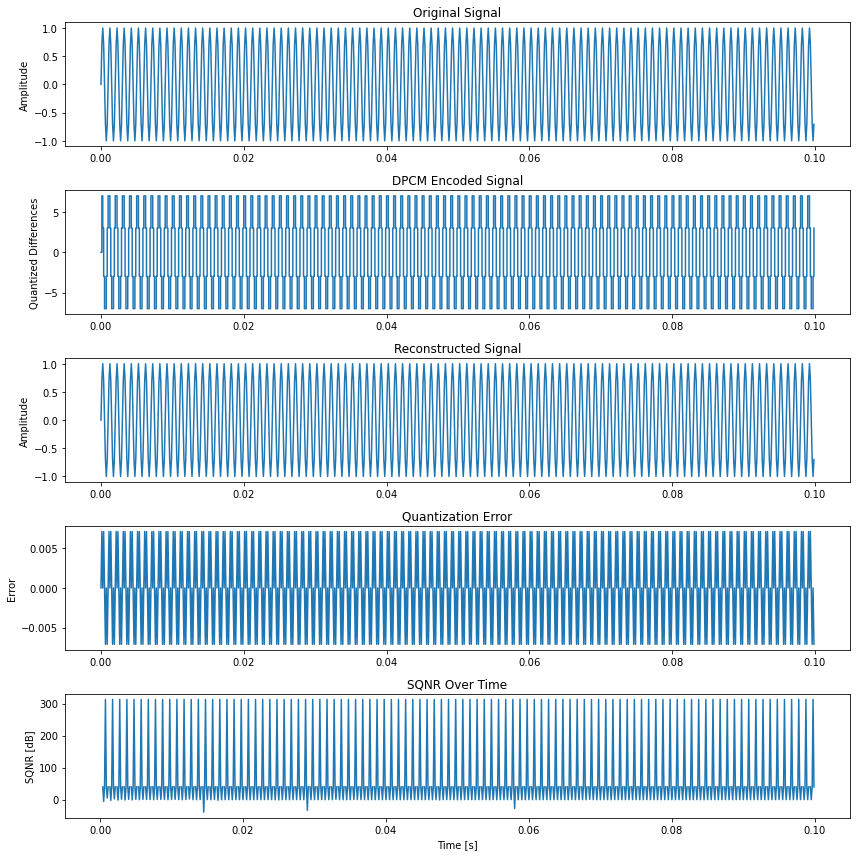

In [24]:
# Generate a sample input signal (e.g., a sine wave)
fs = 8000  # Sampling frequency
duration = 0.01  # in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Signal frequency in Hz
amplitude = 1
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Encode the signal using DPCM
step_size = 0.1  # Adjust the quantization step size as needed
bit_depth = 4  # Number of bits per sample
encoded_signal, predictor_values = dpcm_encode(signal, step_size=step_size, bit_depth=bit_depth)

# Decode the signal
reconstructed_signal = dpcm_decode(encoded_signal, step_size=step_size, bit_depth=bit_depth)

# Calculate the quantization error
error_signal = signal - reconstructed_signal

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(error_signal ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_signal) * bit_depth
print(f"DPCM Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.step(t, encoded_signal, where='post')
plt.title('DPCM Encoded Signal')
plt.ylabel('Quantized Differences')

plt.subplot(5, 1, 3)
plt.plot(t, reconstructed_signal)
plt.title('Reconstructed Signal')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 4)
plt.plot(t, error_signal)
plt.title('Quantization Error')
plt.ylabel('Error')

plt.subplot(5, 1, 5)
plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')

plt.tight_layout()
plt.show()

### ADPCM Modulation

ADPCM Encoding:
Total bits used: 3200
SQNR: 42.97 dB


/tmp/ipykernel_116314/2066541479.py:56: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))
/tmp/ipykernel_116314/2066541479.py:56: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))


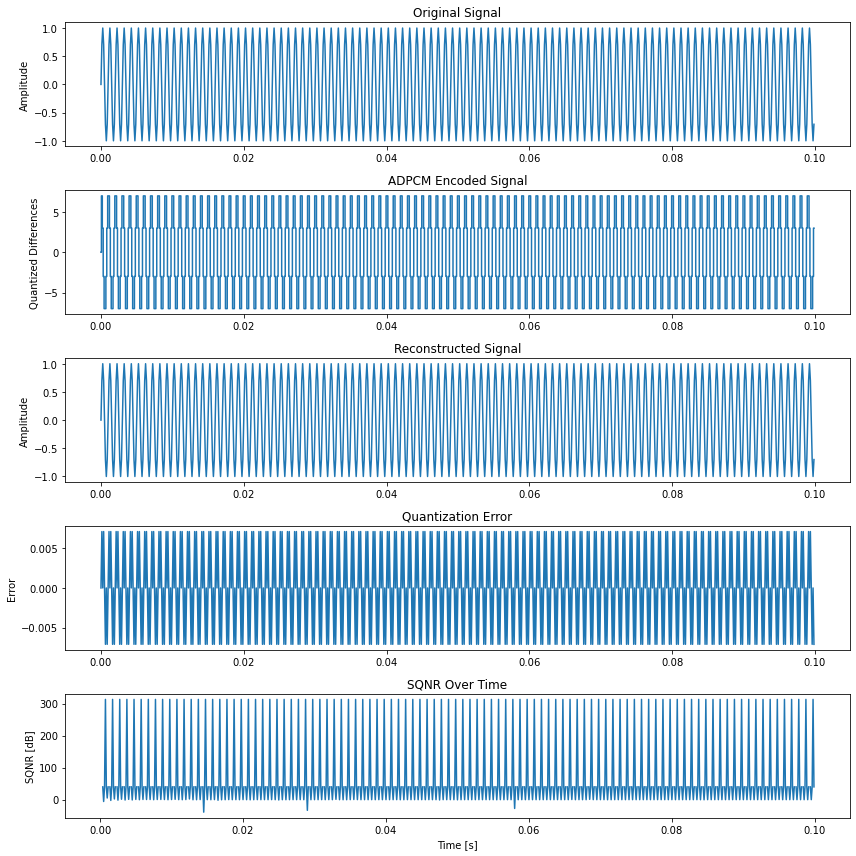

In [25]:
# Generate a sample input signal (e.g., a sine wave)
fs = 8000  # Sampling frequency
duration = 0.01  # in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Signal frequency in Hz
amplitude = 1
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Encode the signal using ADPCM
initial_step_size = 0.1
bit_depth = 4  # Adjust the number of bits (e.g., 4 bits)

encoded_adpcm,step_size_adpcm = adpcm_encode(signal, initial_step_size=initial_step_size_adpcm, bit_depth=num_bits)

# Decode the signal
reconstructed_adpcm = adpcm_decode(encoded_adpcm, initial_step_size=initial_step_size_adpcm, bit_depth=num_bits)

# Calculate the quantization error
error_signal = signal - reconstructed_signal

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(error_signal ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_signal) * bit_depth
print(f"ADPCM Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.step(t, encoded_signal, where='mid')
plt.title('ADPCM Encoded Signal')
plt.ylabel('Quantized Differences')

plt.subplot(5, 1, 3)
plt.plot(t, reconstructed_signal)
plt.title('Reconstructed Signal')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 4)
plt.plot(t, error_signal)
plt.title('Quantization Error')
plt.ylabel('Error')

plt.subplot(5, 1, 5)
plt.plot(t, 10 * np.log10(signal[:len(error_signal)] ** 2 / error_signal ** 2))
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')

plt.tight_layout()
plt.show()

### Delta Modulation

Delta Modulation Encoding:
Total bits used: 80
SQNR: 0.99 dB


/tmp/ipykernel_116314/3091200532.py:64: RuntimeWarning: divide by zero encountered in log10
  sqnr_over_time = 10 * np.log10((signal ** 2) / (error_signal ** 2 + 1e-12))


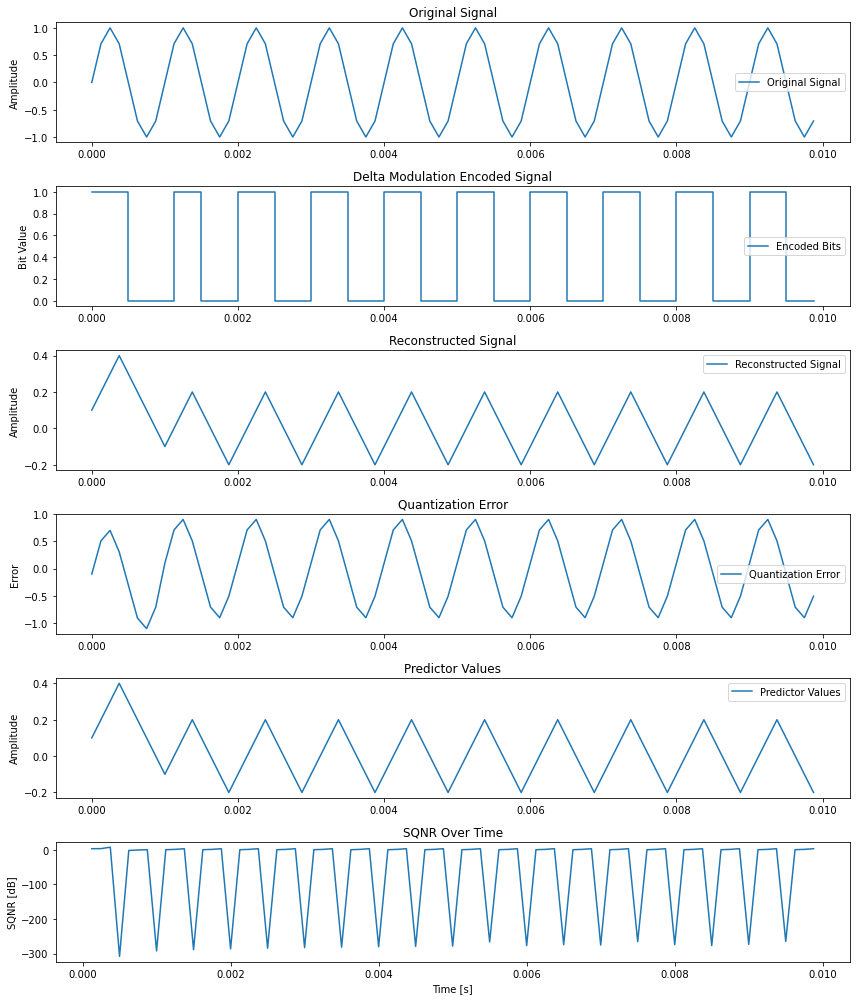

In [26]:
# Generate a sample input signal (e.g., a sine wave with higher frequency to induce overload)
fs = 8000  # Sampling frequency
duration = 0.01  # in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Increased signal frequency to induce overload
amplitude = 1
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Encode the signal using Delta Modulation with a small step size to highlight overload
delta = 0.1  # Small step size to cause overload distortion
encoded_bits, predictor_values = delta_modulation_encode(signal, delta)

# Decode the signal
reconstructed_signal = delta_modulation_decode(encoded_bits, delta)

# Calculate the quantization error
error_signal = signal - reconstructed_signal

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(error_signal ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_bits)
print(f"Delta Modulation Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 14))

plt.subplot(6, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 2)
plt.step(t, encoded_bits, where='post', label='Encoded Bits')
plt.title('Delta Modulation Encoded Signal')
plt.ylabel('Bit Value')
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 4)
plt.plot(t, error_signal, label='Quantization Error')
plt.title('Quantization Error')
plt.ylabel('Error')
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(t, predictor_values, label='Predictor Values')
plt.title('Predictor Values')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 6)
sqnr_over_time = 10 * np.log10((signal ** 2) / (error_signal ** 2 + 1e-12))
plt.plot(t, sqnr_over_time)
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')

plt.tight_layout()
plt.show()


### Sigma Delta Modulation

/opt/anaconda3/envs/digicomm/lib/python3.9/site-packages/scipy/signal/filter_design.py:689: UserWarning: The group delay is singular at frequencies [3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.135, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.136, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.137, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.138, 3.13

Sigma-Delta Modulation Encoding:
Total bits used: 1280
SQNR: -2.17 dB


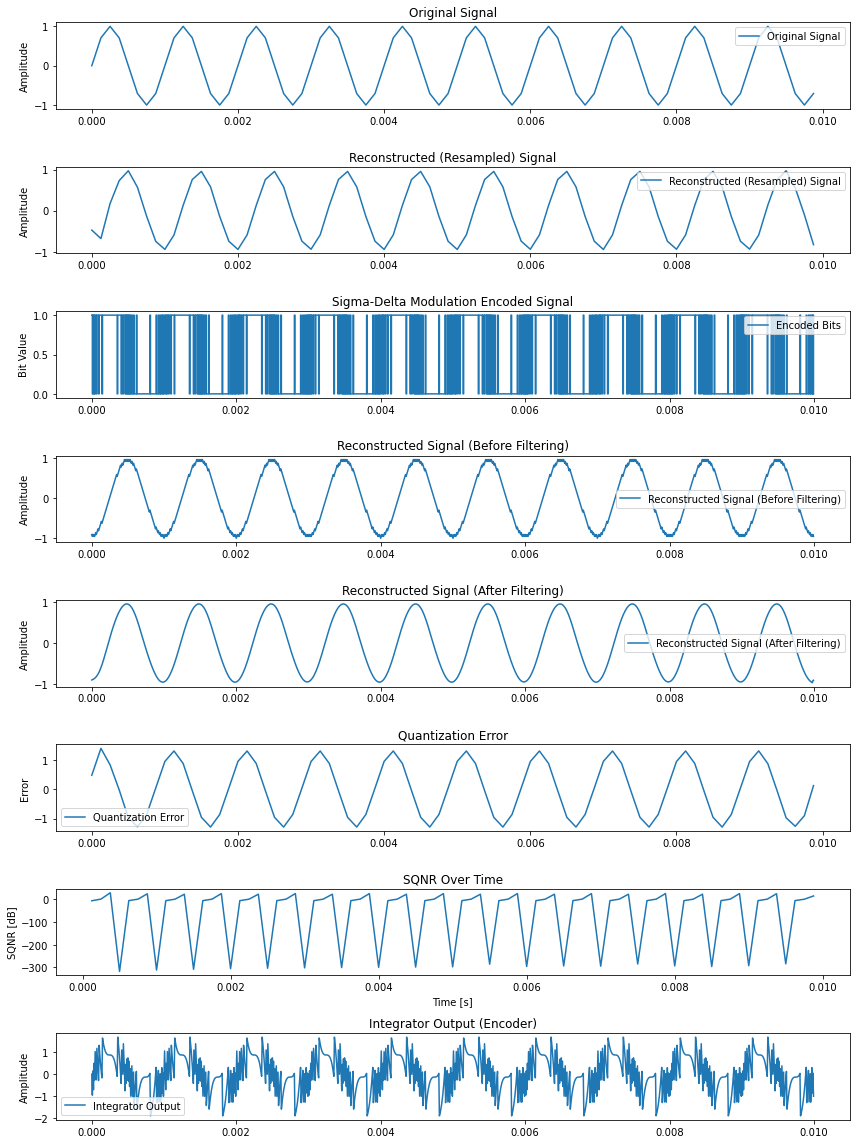

In [27]:
# Generate a sample input signal (e.g., a sine wave with higher frequency to induce overload)



OSR = 16
fs = 8000  # Reduced sampling frequency to lower oversampling ratio
duration = 0.01  # in seconds
frequency = 1000  # Increased signal frequency to approach Nyquist limit
amplitude = 1

# Original Signal
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = amplitude * np.sin(2 * np.pi * frequency * t)


fs_sigma_delta = fs * OSR
t_sigma_delta = np.linspace(0, duration, int(fs_sigma_delta * duration), endpoint=False)
signal_sigma_delta = amplitude*np.sin(2 * np.pi * frequency * t_sigma_delta)

# Encode the signal using Sigma-Delta Modulation
encoded_bits, integrator_output, quantizer_output = sigma_delta_modulation_encode(signal_sigma_delta)

# Decode the signal
reconstructed_signal = sigma_delta_modulation_decode(encoded_bits)

# Apply a low-pass filter to remove high-frequency quantization noise
cutoff_frequency = fs/2  # Cutoff frequency of the filter in Hz
filtered_reconstructed_signal,average_gd = lowpass_filter(reconstructed_signal, cutoff_frequency, fs_sigma_delta, order=5)

# Align the amplitude of the reconstructed signal with the original signal
filtered_reconstructed_signal = filtered_reconstructed_signal * amplitude

# Shift the reconstructed signal to compensate for delay
filtered_reconstructed_signal = np.roll(filtered_reconstructed_signal, -average_gd)

# Resample to original sampling rate
reconstructed_resampled = resample_poly(filtered_reconstructed_signal, up=1, down=OSR)


# Calculate the quantization error
error_signal = signal - reconstructed_resampled

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(error_signal ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_bits)
print(f"Sigma-Delta Modulation Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 16))

plt.subplot(8, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(8, 1, 2)
plt.plot(t, reconstructed_resampled, label='Reconstructed (Resampled) Signal')
plt.title('Reconstructed (Resampled) Signal')
plt.ylabel('Amplitude')
plt.legend()


plt.subplot(8, 1, 3)
plt.step(t_sigma_delta, encoded_bits, where='post', label='Encoded Bits')
plt.title('Sigma-Delta Modulation Encoded Signal')
plt.ylabel('Bit Value')
plt.legend()

plt.subplot(8, 1, 4)
plt.plot(t_sigma_delta, reconstructed_signal, label='Reconstructed Signal (Before Filtering)')
plt.title('Reconstructed Signal (Before Filtering)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(8, 1, 5)
plt.plot(t_sigma_delta, filtered_reconstructed_signal, label='Reconstructed Signal (After Filtering)')
plt.title('Reconstructed Signal (After Filtering)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(8, 1, 6)
plt.plot(t, error_signal, label='Quantization Error')
plt.title('Quantization Error')
plt.ylabel('Error')
plt.legend()

plt.subplot(8, 1, 7)
sqnr_over_time = 10 * np.log10((signal ** 2) / (error_signal ** 2 + 1e-12))
plt.plot(t, sqnr_over_time)
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')

plt.subplot(8, 1, 8)
plt.plot(t_sigma_delta, integrator_output, label='Integrator Output')
plt.title('Integrator Output (Encoder)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

### Adaptive Delta Modulation

Adaptive Delta Modulation Encoding:
Total bits used: 80
SQNR: 2.89 dB


/tmp/ipykernel_116314/57965522.py:71: RuntimeWarning: divide by zero encountered in log10
  sqnr_over_time = 10 * np.log10((signal ** 2) / (error_signal ** 2 + 1e-12))


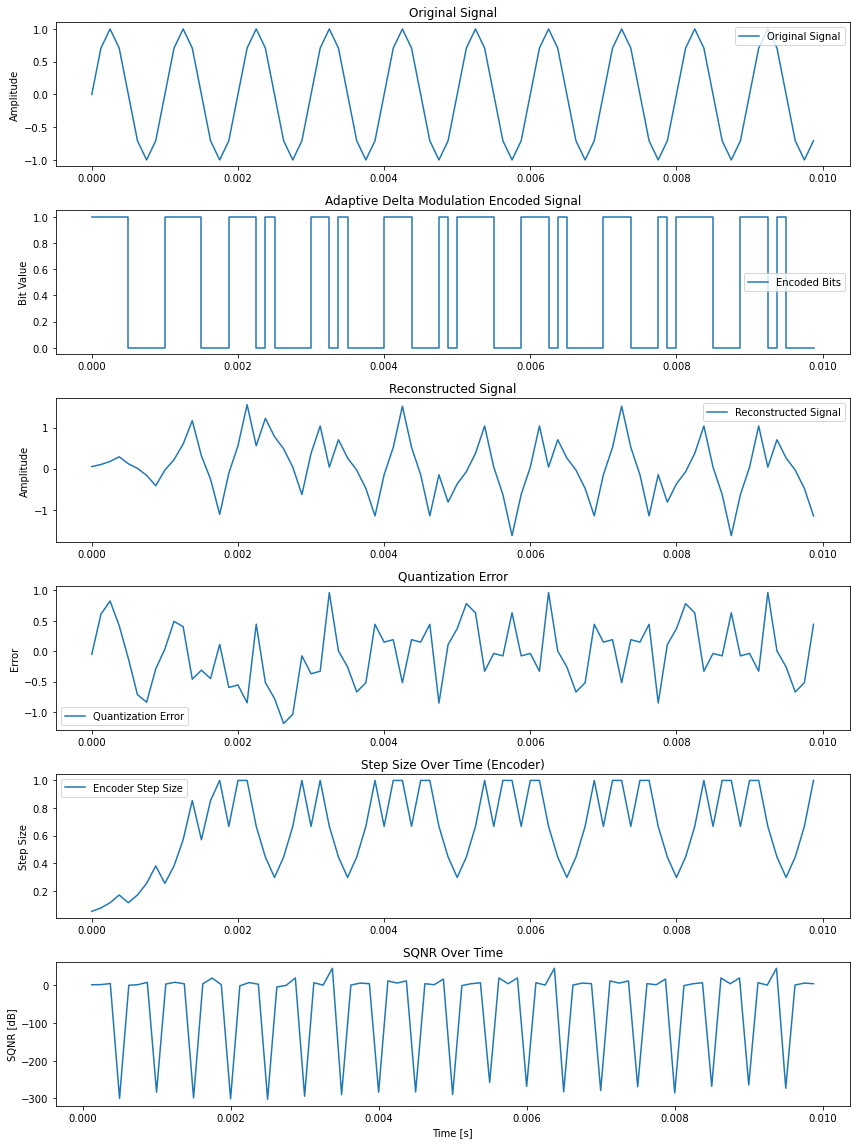

In [28]:
# Generate a sample input signal (e.g., a sine wave with varying frequency)
fs = 8000  # Sampling frequency
duration = 0.01  # in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequency = 1000  # Increased signal frequency to approach Nyquist limit
#frequency = np.linspace(500, 1500, len(t))  # Varying frequency to test adaptation
amplitude = 1
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Encode the signal using Adaptive Delta Modulation
delta_min = 0.05
delta_max = 1.0
alpha = 1.5
encoded_bits, predictor_values, encoder_step_sizes = adaptive_delta_modulation_encode(
    signal, delta_min, delta_max, alpha
)

# Decode the signal
reconstructed_signal, decoder_step_sizes = adaptive_delta_modulation_decode(
    encoded_bits, delta_min, delta_max, alpha
)

# Calculate the quantization error
error_signal = signal - reconstructed_signal

# Calculate Signal Power and Quantization Noise Power
signal_power = np.mean(signal ** 2)
noise_power = np.mean(error_signal ** 2)
SQNR = 10 * np.log10(signal_power / noise_power)

# Output the number of bits used
total_bits = len(encoded_bits)
print(f"Adaptive Delta Modulation Encoding:")
print(f"Total bits used: {total_bits}")
print(f"SQNR: {SQNR:.2f} dB")

# Plot the results
plt.figure(figsize=(12, 16))

plt.subplot(6, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 2)
plt.step(t, encoded_bits, where='post', label='Encoded Bits')
plt.title('Adaptive Delta Modulation Encoded Signal')
plt.ylabel('Bit Value')
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 4)
plt.plot(t, error_signal, label='Quantization Error')
plt.title('Quantization Error')
plt.ylabel('Error')
plt.legend()

plt.subplot(6, 1, 5)
plt.plot(t, encoder_step_sizes, label='Encoder Step Size')
plt.title('Step Size Over Time (Encoder)')
plt.ylabel('Step Size')
plt.legend()

plt.subplot(6, 1, 6)
sqnr_over_time = 10 * np.log10((signal ** 2) / (error_signal ** 2 + 1e-12))
plt.plot(t, sqnr_over_time)
plt.title('SQNR Over Time')
plt.xlabel('Time [s]')
plt.ylabel('SQNR [dB]')

plt.tight_layout()
plt.show()
